In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

In [75]:
import math

def entropy( x, b ):
    s = 0
    for p in x:
        if p > 0:
            s += -p*math.log(p,b)
        # end
    # end
    return s
# end

def visualize_regions(model, MAX, nGrid):
    a1 = np.linspace(-MAX, MAX, nGrid)
    a2 = np.linspace(-MAX, MAX, nGrid)

    A1, A2 = np.meshgrid(a1, a2)
    A1 = A1.flatten()
    A2 = A2.flatten()
    A = np.vstack((A1, A2)).T

    # Predict B
    B = model.predict(A)
    B = B.reshape(nGrid, nGrid)
    B = np.flipud(B)

    # Compute entropy for S
    prob_2D = model.predict_proba(A)
    S = np.array([entropy(p, 2) for p in prob_2D])
    S = S.reshape(nGrid, nGrid)
    S = np.flipud(S)

    return B, S
# end

## Create data

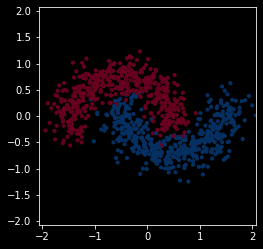

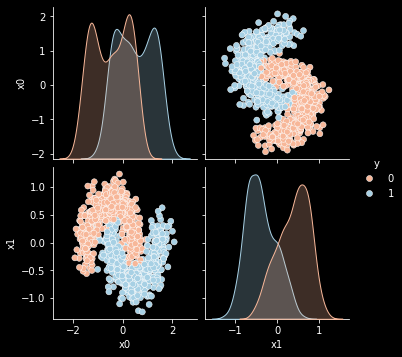

In [76]:
from sklearn.datasets import make_classification, make_blobs, make_moons, make_circles

n_samples = 1000

choice = 2

if   choice == 0:
    X, y = make_blobs(
        n_samples=n_samples,
        n_features=2,
        centers=3,
        cluster_std=4,
        random_state=10
    )
elif choice == 1:
    X, y = make_classification(
        n_samples=n_samples,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_clusters_per_class=1,
        n_classes=3,
        random_state=41
    )
elif choice == 2:
    X, y = make_moons(
        n_samples=n_samples,
        noise=0.2,
        random_state=42
    )
elif choice == 3:
    X, y = make_circles(
        n_samples=n_samples,
        noise=0.1,
        factor=0.5,
        random_state=42
    )
# end

X = X - X.mean(axis=0)

MAX = np.max(np.abs(X))

plt.style.use('dark_background')

plt.scatter(X[:,0], X[:,1], c=y, s=10, cmap="RdBu");
plt.xlim(-MAX,MAX)
plt.ylim(-MAX,MAX)
plt.gca().set_aspect('equal')
plt.show()

df = pd.DataFrame( {"x0":X[:,0], "x1":X[:,1], "y":y} )
sns.pairplot(df, hue='y', palette='RdBu')
plt.show()

## Modeling

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y
)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=1,   weights='uniform'),
    KNeighborsClassifier(n_neighbors=5,   weights='uniform'),
    KNeighborsClassifier(n_neighbors=10,  weights='uniform'),
    KNeighborsClassifier(n_neighbors=50,  weights='uniform'),
    RandomForestClassifier(n_estimators=10,  max_leaf_nodes=3),
    RandomForestClassifier(n_estimators=10,  max_leaf_nodes=10),
    RandomForestClassifier(n_estimators=100, max_leaf_nodes=3),
    RandomForestClassifier(n_estimators=100, max_leaf_nodes=10),
    RandomForestClassifier(n_estimators=100, max_leaf_nodes=30),
    GradientBoostingClassifier(n_estimators=10,  learning_rate=0.1, max_leaf_nodes=3),
    GradientBoostingClassifier(n_estimators=10,  learning_rate=0.1, max_leaf_nodes=10),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_leaf_nodes=3),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_leaf_nodes=10),
]

LogisticRegression()


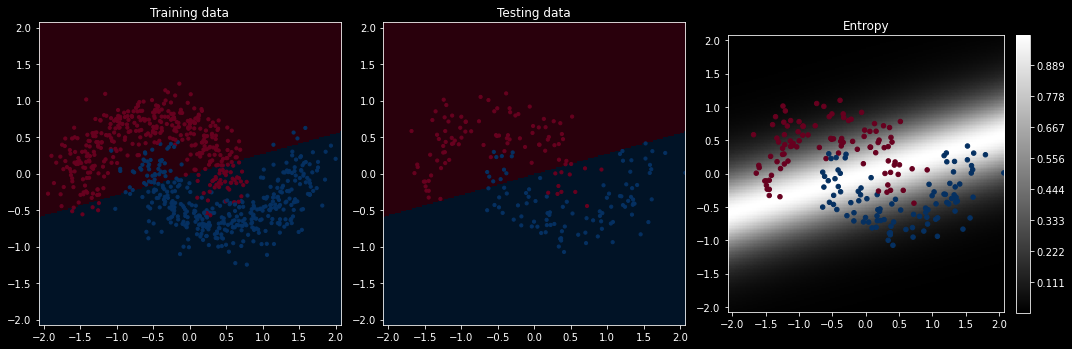

KNeighborsClassifier(n_neighbors=1)


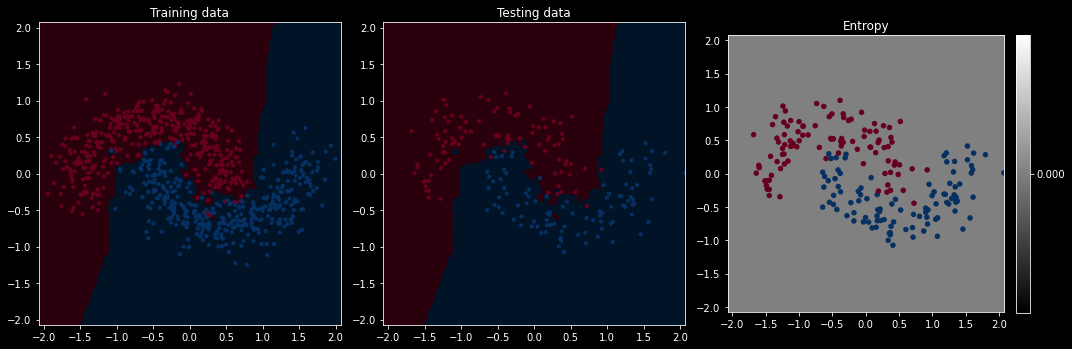

KNeighborsClassifier()


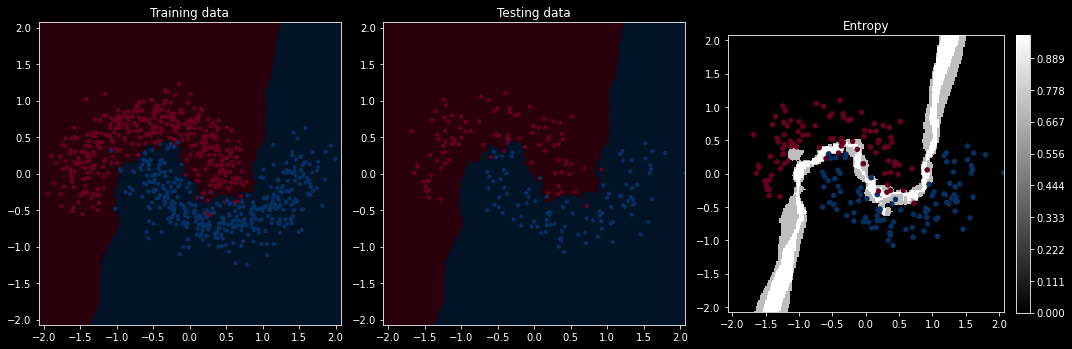

KNeighborsClassifier(n_neighbors=10)


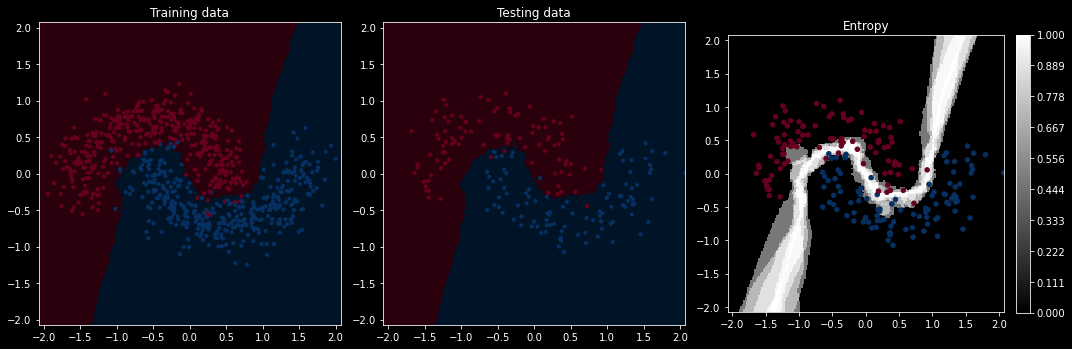

KNeighborsClassifier(n_neighbors=50)


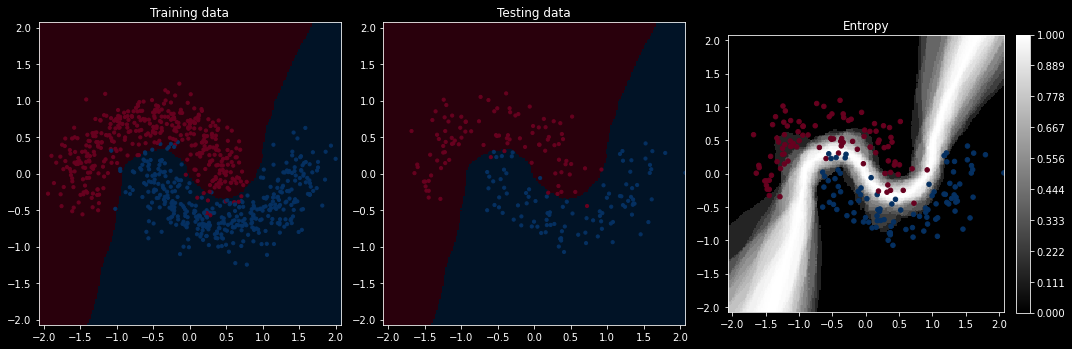

RandomForestClassifier(max_leaf_nodes=3, n_estimators=10)


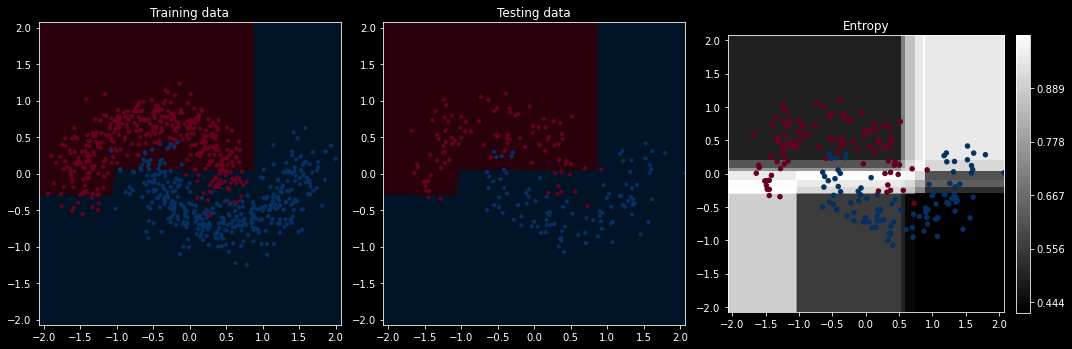

RandomForestClassifier(max_leaf_nodes=10, n_estimators=10)


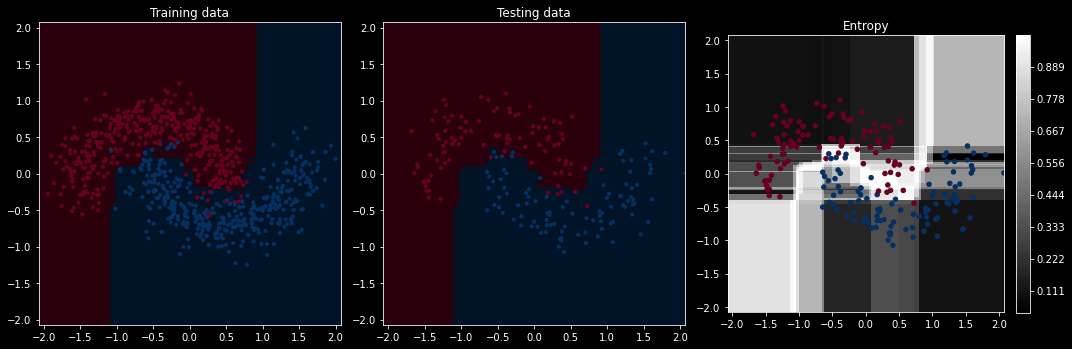

RandomForestClassifier(max_leaf_nodes=3)


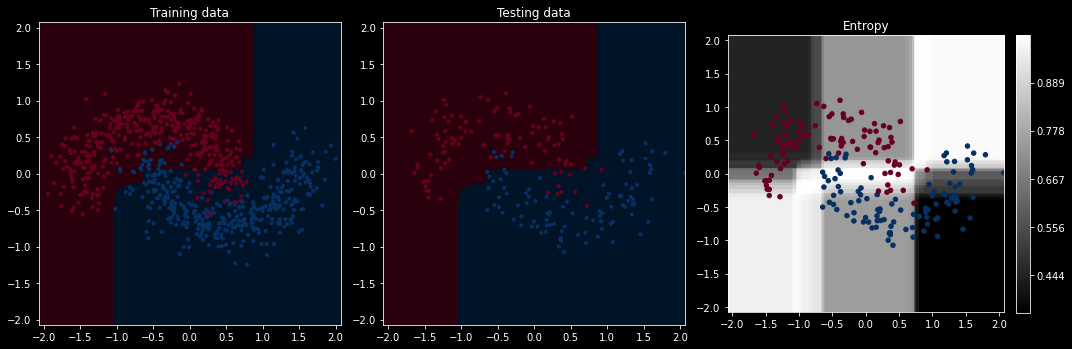

RandomForestClassifier(max_leaf_nodes=10)


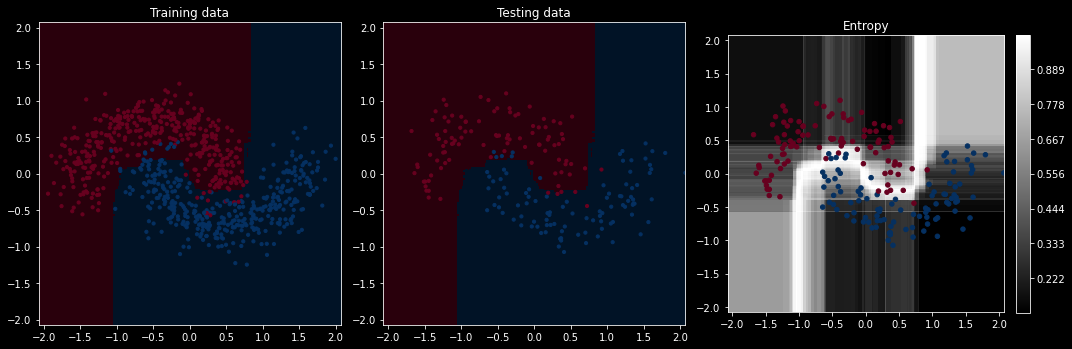

RandomForestClassifier(max_leaf_nodes=30)


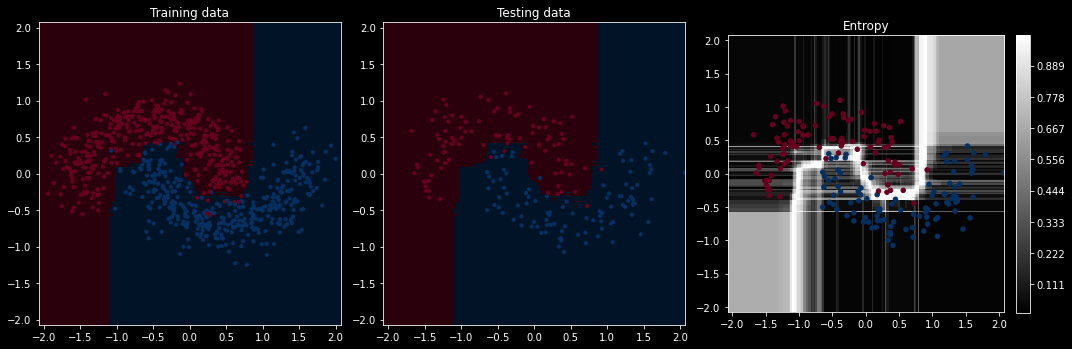

GradientBoostingClassifier(max_leaf_nodes=3, n_estimators=10)


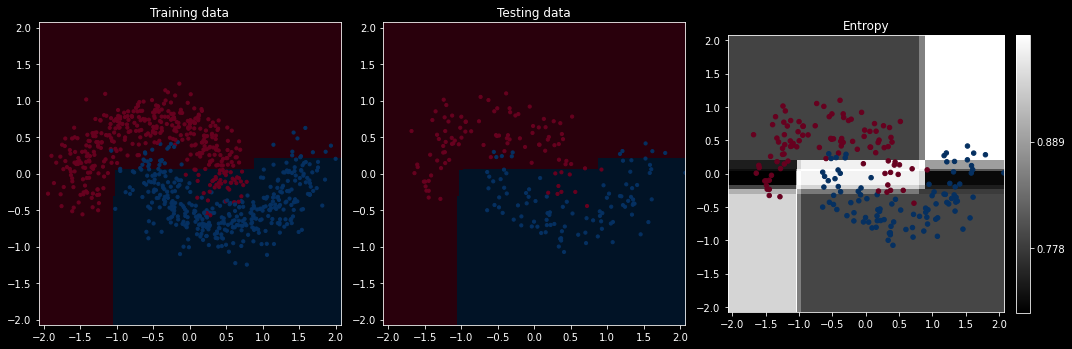

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=10)


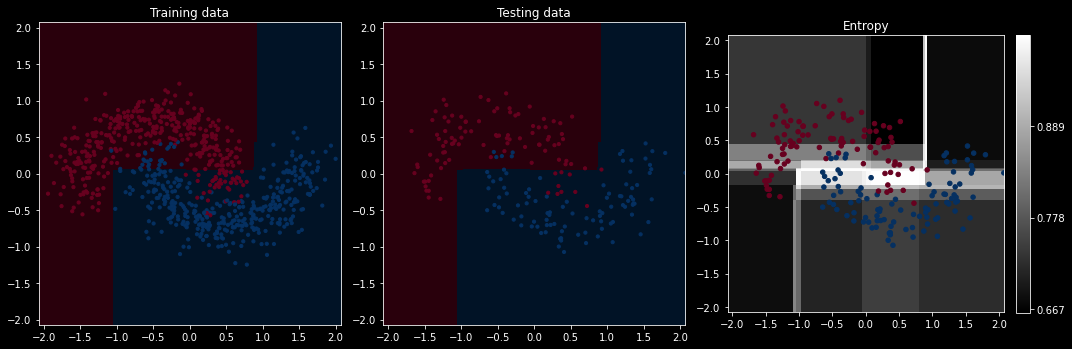

GradientBoostingClassifier(max_leaf_nodes=3)


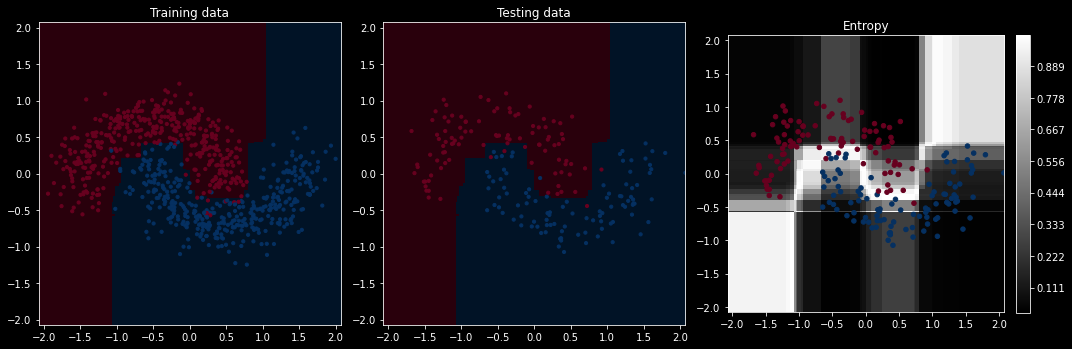

GradientBoostingClassifier(max_leaf_nodes=10)


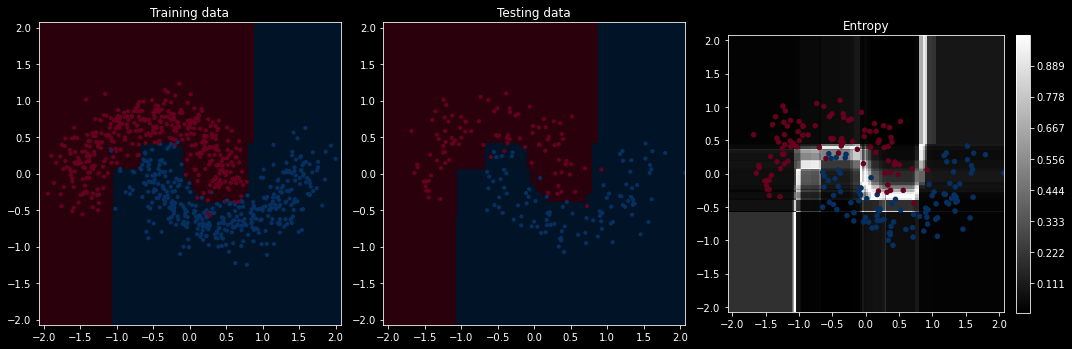

In [79]:
for m in models:
    m.fit(X_train, y_train)
    
    print(m)
    
    B, S = visualize_regions(m, MAX, 200)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    
    extent = [-MAX,MAX,-MAX,MAX]
    
    cmap = "RdBu"
    axes[0].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
    axes[0].scatter(X_train[:,0], X_train[:,1], c=y_train, s=10, cmap=cmap);
    axes[0].set_aspect('equal')
    axes[0].set_title('Training data');
    
    axes[1].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
    axes[1].scatter(X_test[:,0], X_test[:,1], c=y_test, s=10, cmap=cmap);
    axes[1].set_aspect('equal')
    axes[1].set_title('Testing data');
    
    im = axes[2].imshow(S, interpolation='none', extent=extent,cmap='gray')
    axes[2].scatter(X_test[:,0], X_test[:,1], c=y_test, s=20, cmap=cmap);
    axes[2].set_aspect('equal')
    axes[2].set_title('Entropy')
    cbar = fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
    cbar.set_ticks(np.linspace(0, math.log(y.max()+1,2), 10))

    plt.tight_layout()
    plt.show()
# end


LogisticRegression()
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       100
           1       0.88      0.89      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



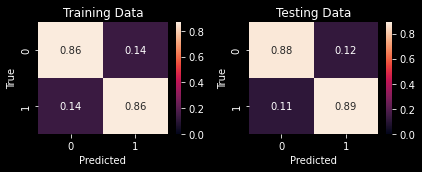

KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       100
           1       0.93      0.99      0.96       100

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



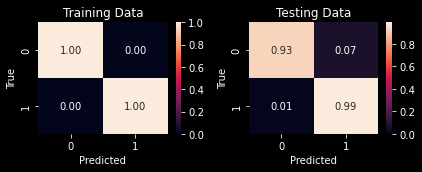

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       100
           1       0.95      0.98      0.97       100

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



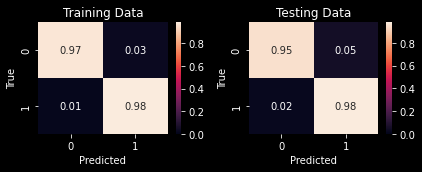

KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       100
           1       0.97      0.98      0.98       100

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



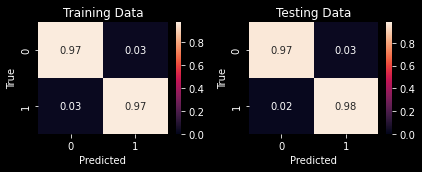

KNeighborsClassifier(n_neighbors=50)
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       100
           1       0.96      0.99      0.98       100

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



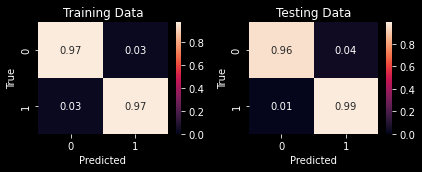

RandomForestClassifier(max_leaf_nodes=3, n_estimators=10)
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       100
           1       0.93      0.89      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



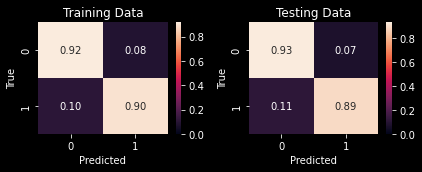

RandomForestClassifier(max_leaf_nodes=10, n_estimators=10)
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       100
           1       0.94      0.94      0.94       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



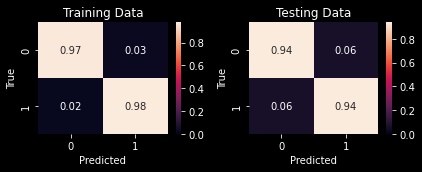

RandomForestClassifier(max_leaf_nodes=3)
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       100
           1       0.89      0.93      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200



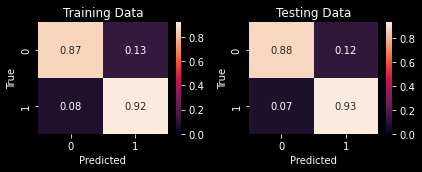

RandomForestClassifier(max_leaf_nodes=10)
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       100
           1       0.94      0.94      0.94       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



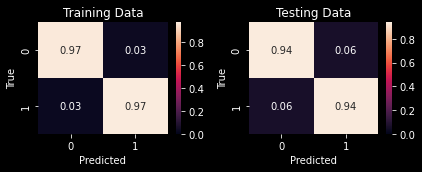

RandomForestClassifier(max_leaf_nodes=30)
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       100
           1       0.95      0.99      0.97       100

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



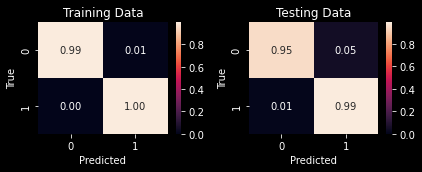

GradientBoostingClassifier(max_leaf_nodes=3, n_estimators=10)
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       100
           1       0.90      0.89      0.89       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



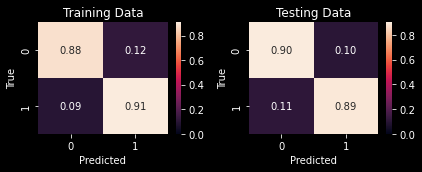

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=10)
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       100
           1       0.90      0.95      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200



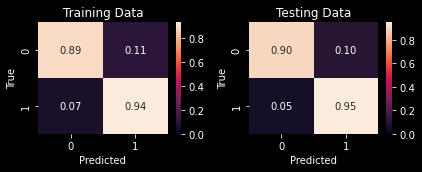

GradientBoostingClassifier(max_leaf_nodes=3)
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       100
           1       0.95      0.99      0.97       100

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



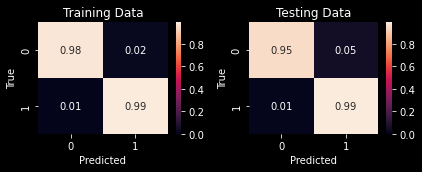

GradientBoostingClassifier(max_leaf_nodes=10)
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       100
           1       0.95      0.99      0.97       100

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



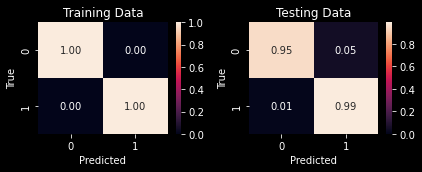

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

for m in models:
    m.fit(X_train, y_train)
    y_train_pred = m.predict(X_train).astype(int)
    y_test_pred = m.predict(X_test).astype(int)
    
    print(m)
    print(classification_report(y_test, y_test_pred))

    # Compute confusion matrices
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)
    
    conf_matrix_train = conf_matrix_train.astype(float)
    conf_matrix_test  = conf_matrix_test.astype(float)
    for i in range(conf_matrix_train.shape[0]):
        conf_matrix_train[i,:] = conf_matrix_train[i,:] / conf_matrix_train[i,:].sum()
        conf_matrix_test[i,:]  = conf_matrix_test[i,:] / conf_matrix_test[i,:].sum()
    # end
    
    # Create subplots for side-by-side visualization
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))
    
    # Plot confusion matrix for training data
    sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='.2f', ax=axes[0])
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("True")
    axes[0].set_title("Training Data")
    
    # Plot confusion matrix for test data
    sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='.2f', ax=axes[1])
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("True")
    axes[1].set_title("Testing Data")
    
    # Show the plots
    plt.tight_layout()
    plt.show()
# end
